<a href="https://colab.research.google.com/github/chaimaagassir/Python-projects/blob/main/TabuTSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initialize the graph
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

import tqdm as tqdm

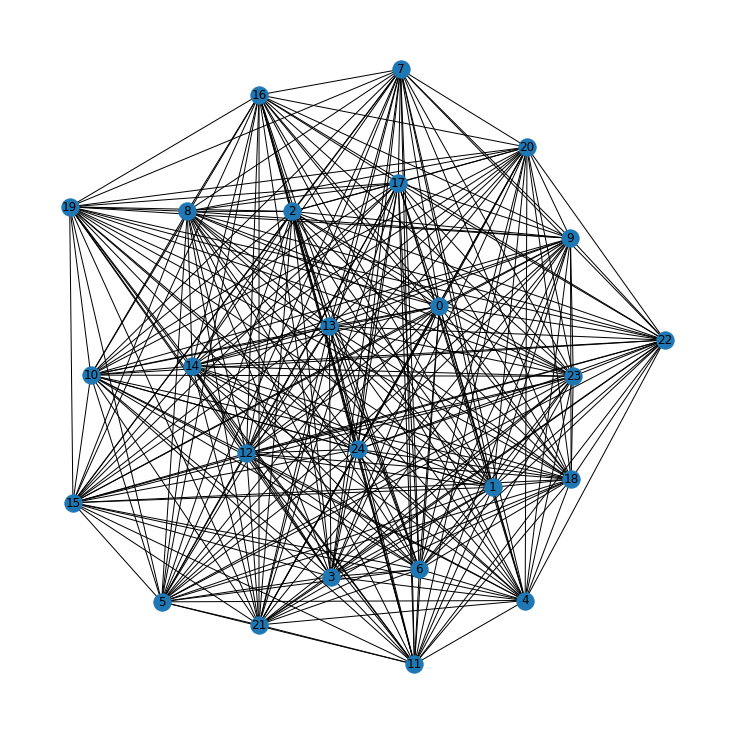

In [2]:
G = nx.complete_graph(25)
for (u,v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.show()

Initial solution: [19, 22, 6, 12, 20, 4, 11, 10, 9, 24, 3, 8, 7, 13, 21, 17, 14, 18, 2, 1, 15, 0, 16, 23, 5]
Initial cost: 114
Best Solution: [2, 4, 16, 14, 13, 12, 1, 19, 18, 24, 22, 8, 6, 20, 21, 17, 11, 10, 15, 9, 5, 0, 7, 23, 3]
Best Cost: 24


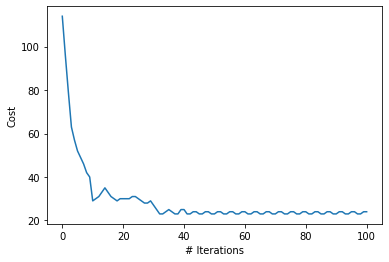

In [3]:
# Define a function to calculate the tour cost
def cost_of_tour(G, tour):
    cost = 0
    for u, v in zip(tour, tour[1:]):
        cost += G[u][v]["weight"]
    cost += G[len(tour) - 1][0]["weight"]
    return cost
def get_best_neighbour(G, tour, tabu_history, tabu_limit, aspiration):
    best_neighbour = None
    best_neighbour_cost = math.inf
    # generate a list of all possible neighbours
    # a neighbour is just swapping the position of two nodes within the tour
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            if i == j:
                continue

            # Swap the ith and jth nodes
            tmp_route = tour.copy()
            tmp = tmp_route[i]
            tmp_route[i] = tmp_route[j]
            tmp_route[j] = tmp
            tmp_cost = cost_of_tour(G, tmp_route)

            # This route is tabu, check aspiration
            if tuple(tmp_route) in tabu_history:
                if tabu_history[tuple(tmp_route)] > 0:
                    if tabu_history[tuple(tmp_route)] > aspiration:
                        continue

            if tmp_cost < best_neighbour_cost:
                best_neighbour_cost = tmp_cost
                best_neighbour = tmp_route
                tabu_history[tuple(best_neighbour)] = tabu_limit

    return best_neighbour
def tabu_search(
    G,
    initial_solution,
    num_iter,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_function,
    neighbour_function,
    use_historical_best=False,
    use_tqdm = False
):
    best_solution = initial_solution
    historical_best = best_solution
    historical_best_cost = cost_function(G,historical_best)
    best_cost = cost_function(G, best_solution)
    states = [best_cost]
    if use_tqdm:
        pbar = tqdm(total=num_iter)
    for _ in range(num_iter):
        # Reduce counter for all tabu
        if use_tqdm: pbar.update()
        for x in tabu_history:
            tabu_history[x] -= 1
        tabu_history = {x: tabu_history[x] for x in tabu_history if tabu_history[x] > 0}

        best_solution = neighbour_function(
            G, best_solution, tabu_history, tabu_limit, aspiration
        )
        best_cost = cost_function(G, best_solution)
        if best_cost <= historical_best_cost:
            historical_best = best_solution
            historical_best_cost = best_cost
        states.append(best_cost)
    return best_solution, best_cost, states
# Initialize some parameters
aspiration = 2
tabu_history = {}
num_iterations = 100
tabu_limit = 5

# Initialize a random solution, and its cost
initial_solution = [*G.nodes()]
random.shuffle(initial_solution)
initial_cost = cost_of_tour(G, initial_solution)
print(f"Initial solution: {initial_solution}")
print(f"Initial cost: {initial_cost}")

best_solution, best_cost, states = tabu_search(
    G,
    initial_solution,
    num_iterations,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_of_tour,
    get_best_neighbour,
)
print(f"Best Solution: {best_solution}")
print(f"Best Cost: {best_cost}")
plt.xlabel("# Iterations")
plt.ylabel("Cost")
plt.plot(states)
plt.show()